In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Load the layoff dataset.
file_path = "./Resources/reclassified.csv"
lay = pd.read_csv(file_path, index_col=False)
lay.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,country,mass_layoff,global_industry
0,Pear Therapeutics,Boston,Healthcare,170.0,0.92,2023-04-07,United States,1.0,Healthcare
1,ZestMoney,Bengaluru,Finance,100.0,0.20,2023-04-07,India,1.0,Financial
2,Absolute Software,Vancouver,Security,40.0,0.05,2023-04-06,Canada,0.0,Industrial
3,Avocargo,Berlin,Transportation,16.0,1.00,2023-04-06,Germany,0.0,Energy
4,Dunzo,Bengaluru,Food,300.0,0.30,2023-04-05,India,1.0,Consumer_Staples


In [3]:
#Check dtypes
lay.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1245 entries, 0 to 1244
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   company              1245 non-null   object 
 1   location             1245 non-null   object 
 2   industry             1245 non-null   object 
 3   total_laid_off       1245 non-null   float64
 4   percentage_laid_off  1245 non-null   float64
 5   date                 1245 non-null   object 
 6   country              1245 non-null   object 
 7   mass_layoff          1245 non-null   float64
 8   global_industry      1245 non-null   object 
dtypes: float64(3), object(6)
memory usage: 87.7+ KB


In [4]:
# Convert dates to datetime

lay['date']= pd.to_datetime(lay['date'])
print(lay.dtypes)

company                        object
location                       object
industry                       object
total_laid_off                float64
percentage_laid_off           float64
date                   datetime64[ns]
country                        object
mass_layoff                   float64
global_industry                object
dtype: object


In [5]:
# Create dataframe to check for 1st Quarter 2022
lay1 = lay[(lay['date'] > "2021-12-31")&(lay['date'] < "2022-04-01")]
lay1.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,country,mass_layoff,global_industry
851,Rasa,Berlin,Data,59.0,0.40,2022-03-30,Germany,1.0,Info_Tech
852,Gopuff,Philadelphia,Food,450.0,0.03,2022-03-29,United States,1.0,Consumer_Staples
853,Thinkific,Vancouver,Education,100.0,0.20,2022-03-29,Canada,1.0,Consumer_Discretionary
854,Storytel,Stockholm,Media,100.0,0.10,2022-03-17,Sweden,1.0,Communication
855,Trell,Bengaluru,Retail,300.0,0.50,2022-03-15,India,1.0,Consumer_Staples


In [6]:
# Create dataframe to check for 2nd Quarter
lay2 = lay[(lay['date'] > "2022-03-31")&(lay['date'] < "2022-07-01")]
lay2.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,country,mass_layoff,global_industry
675,Enjoy,SF Bay Area,Retail,400.0,0.18,2022-06-30,United States,1.0,Consumer_Staples
676,Crejo.Fun,Bengaluru,Education,170.0,1.00,2022-06-30,India,1.0,Consumer_Discretionary
677,Stash Financial,New York City,Finance,40.0,0.08,2022-06-30,United States,0.0,Financial
678,Nate,New York City,Retail,30.0,0.20,2022-06-30,United States,0.0,Consumer_Staples
679,Stream,Boulder,Product,20.0,0.12,2022-06-30,United States,0.0,Materials


In [7]:
# Create dataframe to check for 3rd Quarter
lay3 = lay[(lay['date'] > "2022-06-30")&(lay['date'] < "2022-10-01")]
lay3.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,country,mass_layoff,global_industry
489,Spin,SF Bay Area,Transportation,78.0,0.10,2022-09-30,United States,1.0,Energy
490,Mux,SF Bay Area,Infrastructure,40.0,0.20,2022-09-29,United States,0.0,Industrial
491,DocuSign,SF Bay Area,Sales,671.0,0.09,2022-09-28,United States,1.0,Industrial
492,Divvy Homes,SF Bay Area,Real Estate,40.0,0.12,2022-09-27,United States,0.0,Real_Estate
493,Moss,Berlin,Finance,70.0,0.15,2022-09-23,Germany,1.0,Financial


In [8]:
# Create dataframe to check for 4th Quarter
lay4 = lay[(lay['date'] > "2022-9-30")&(lay['date'] < "2023-01-01")]
lay4.head()

,company,location,industry,total_laid_off,percentage_laid_off,date,country,mass_layoff,global_industry
259,PayU,Amsterdam,Finance,150.0,0.06,2022-12-26,Netherlands,1.0,Financial
260,Willow,Sydney,Real Estate,99.0,0.22,2022-12-23,Australia,1.0,Real_Estate
261,Back Market,Paris,Retail,93.0,0.13,2022-12-23,France,1.0,Consumer_Staples
262,TuSimple,San Diego,Transportation,350.0,0.25,2022-12-21,United States,1.0,Energy
263,Chope,Singapore,Food,65.0,0.24,2022-12-20,Singapore,1.0,Consumer_Staples


In [12]:
#Check to see unique values
lay.nunique()

company                1071
location                131
industry                 29
total_laid_off          259
percentage_laid_off      74
date                    385
country                  39
mass_layoff               2
global_industry          11
dtype: int64

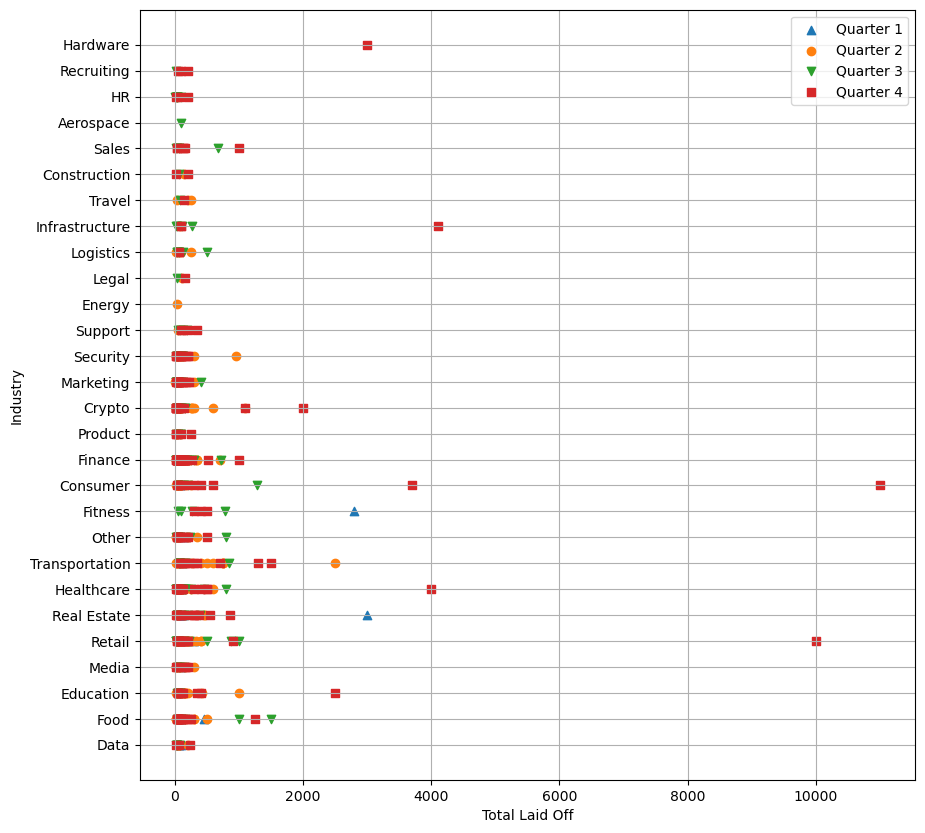

In [17]:
#Show previous way how industries looked without concatenate them together.
plt.figure(figsize=(10,10))
plt.scatter(x='total_laid_off',y='industry',marker = "^", label="Quarter 1", data=lay1)
plt.scatter(x='total_laid_off',y='industry',marker = "o", label="Quarter 2", data=lay2)
plt.scatter(x='total_laid_off',y='industry',marker = "v", label="Quarter 3", data=lay3)
plt.scatter(x='total_laid_off',y='industry',marker = ",", label="Quarter 4", data=lay4)
plt.xlabel('Total Laid Off')
plt.ylabel('Industry')
plt.legend(loc="upper right")
plt.grid()
plt.show()

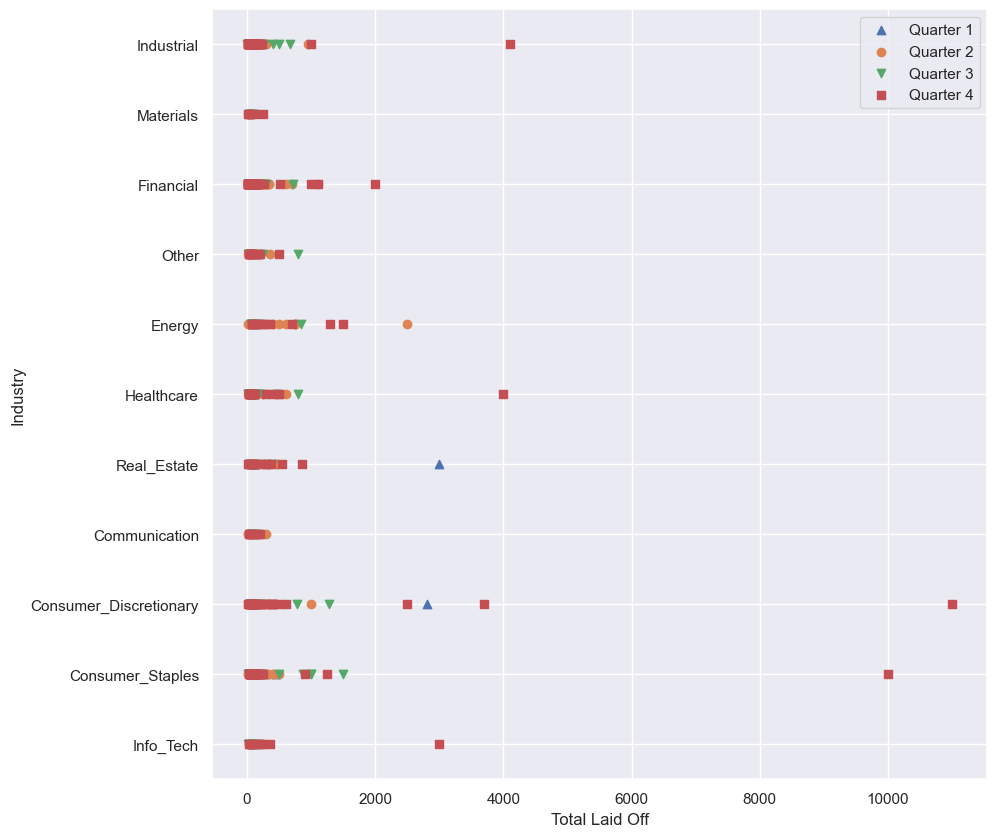

In [20]:
# How it looks with the new categories
plt.figure(figsize=(10,10))
plt.scatter(x='total_laid_off',y='global_industry',marker = "^", label="Quarter 1", data=lay1)
plt.scatter(x='total_laid_off',y='global_industry',marker = "o", label="Quarter 2", data=lay2)
plt.scatter(x='total_laid_off',y='global_industry',marker = "v", label="Quarter 3", data=lay3)
plt.scatter(x='total_laid_off',y='global_industry',marker = ",", label="Quarter 4", data=lay4)
plt.xlabel('Total Laid Off')
plt.ylabel('Industry')
plt.legend(loc="upper right")
plt.grid(linestyle='-')
plt.show()

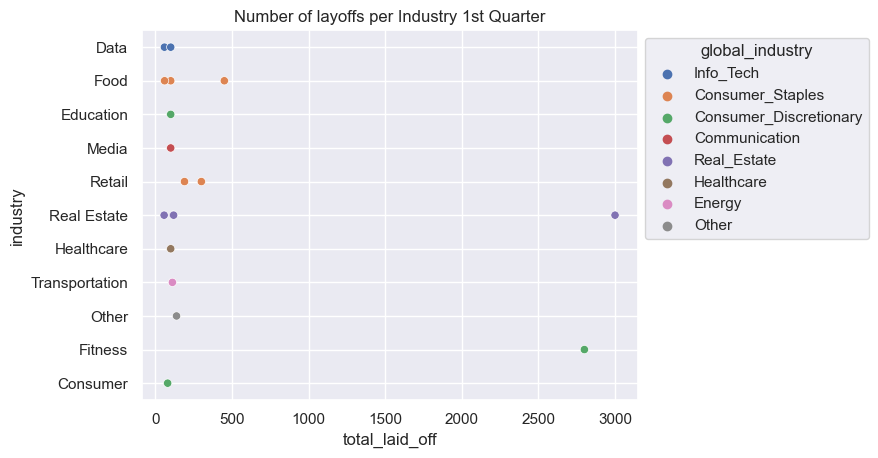

In [16]:
# Quarter 1 2022
ax= sns.scatterplot(x= 'total_laid_off',
        y= 'global_industry',
                hue='global_industry',
               data=lay1)
ax.set_title('Number of layoffs per Industry 1st Quarter')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.show()

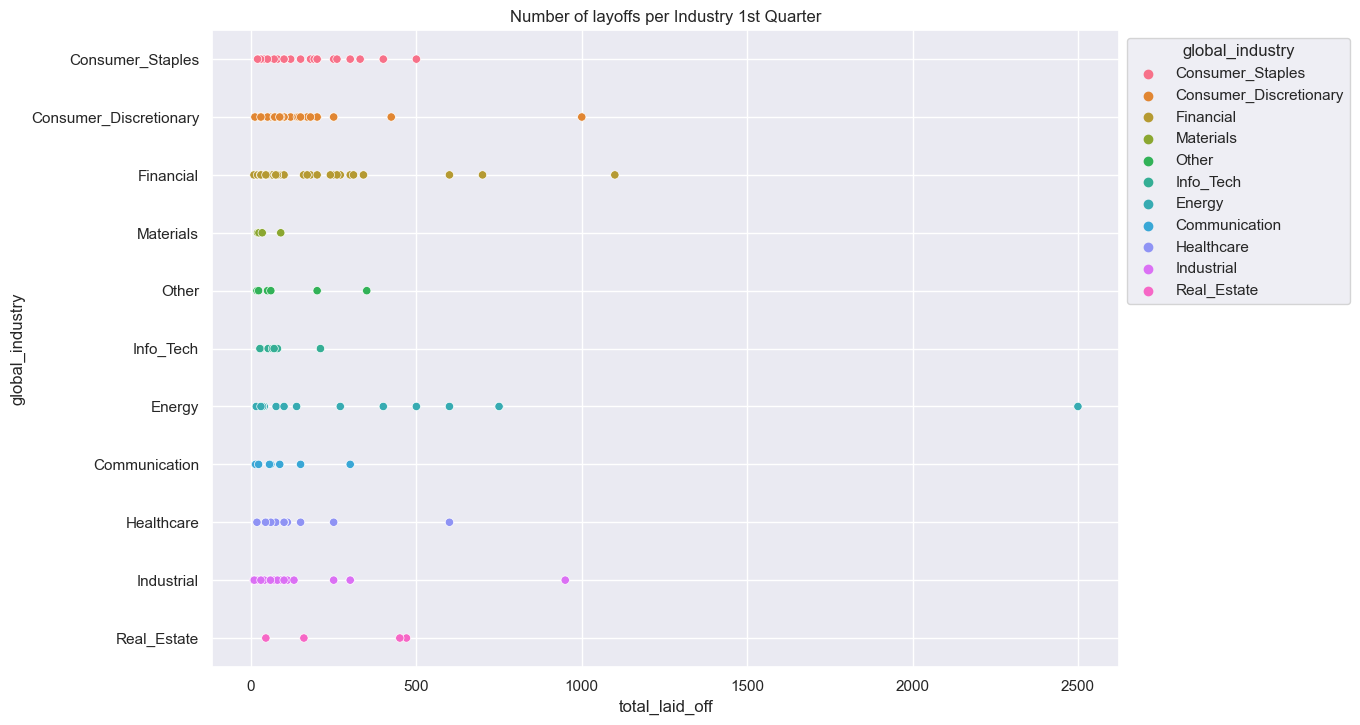

In [20]:
# Quarter 2 2022 
ax= sns.scatterplot(x= 'total_laid_off',
        y= 'global_industry',
                hue='global_industry',
               data=lay2)
ax.set_title('Number of layoffs per Industry 1st Quarter')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.show()

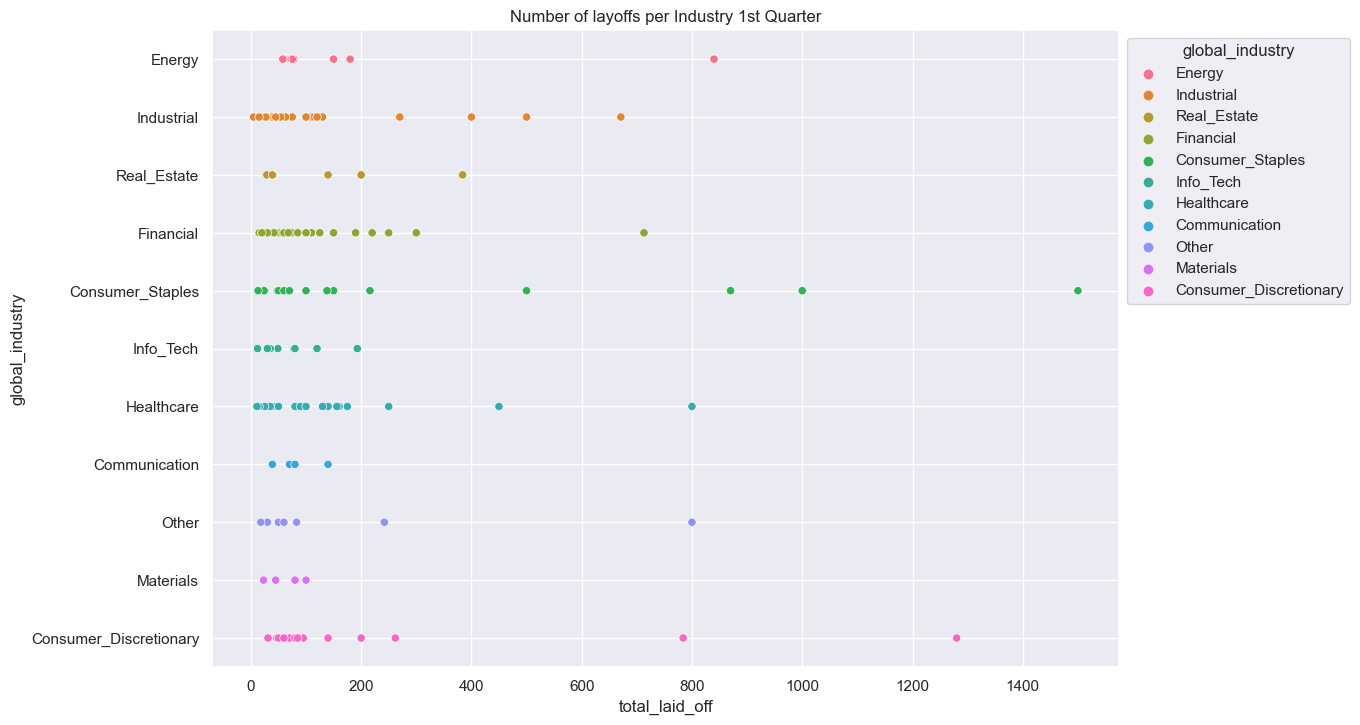

In [21]:
# Quarter 3 2022 
ax= sns.scatterplot(x= 'total_laid_off',
        y= 'global_industry',
                hue='global_industry',
               data=lay3)
ax.set_title('Number of layoffs per Industry 1st Quarter')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.show()

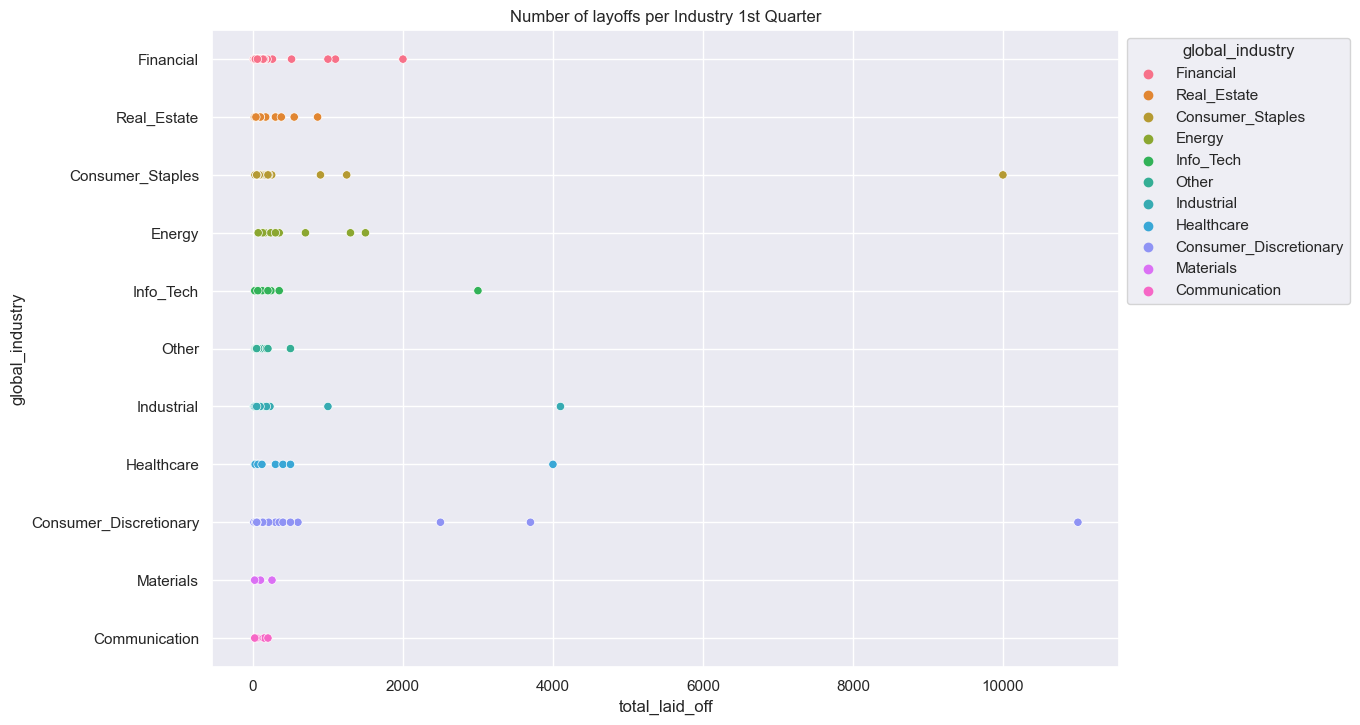

In [22]:
# Quarter 4 2022 
ax= sns.scatterplot(x= 'total_laid_off',
        y= 'global_industry',
                hue='global_industry',
               data=lay4)
ax.set_title('Number of layoffs per Industry 1st Quarter')
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
sns.set(style="darkgrid")
sns.set(rc={'figure.figsize':(11.7,8.27)})
plt.show()

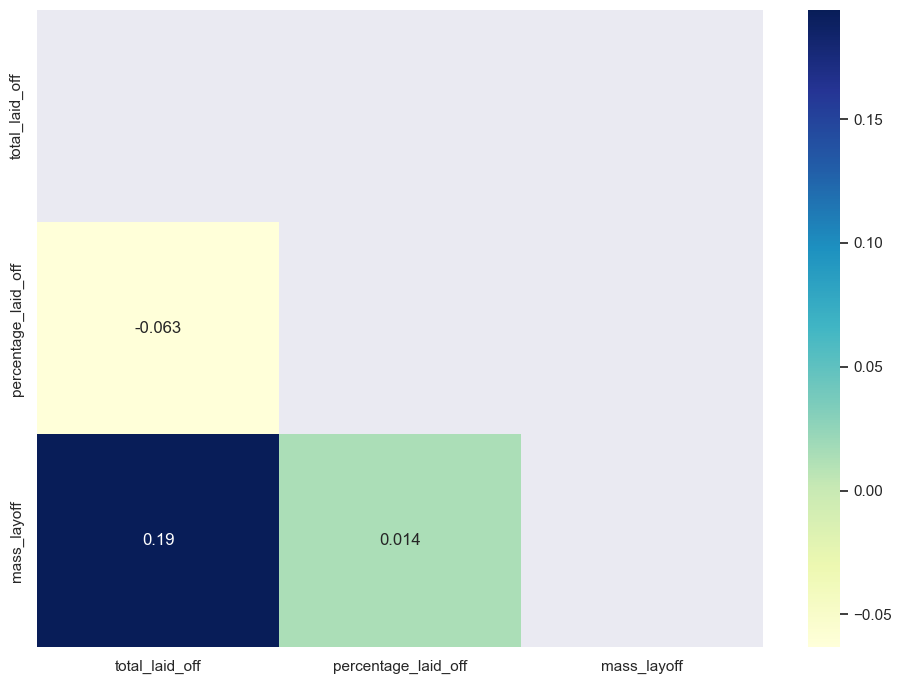

In [37]:
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(lay.corr()))
 
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(lay.corr(), cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
plt.show()

In [54]:
#Group by the new column to see if heatmap turns out better
lay_g = lay.groupby('global_industry')
lay_g.first()

,company,location,industry,total_laid_off,percentage_laid_off,date,country,mass_layoff
global_industry,,,,,,,,
Communication,Roku,SF Bay Area,Media,200.0,0.06,2023-03-30,United States,1
Consumer_Discretionary,Domestika,Madrid,Education,89.0,0.45,2023-03-31,Spain,1
Consumer_Staples,Dunzo,Bengaluru,Food,300.0,0.30,2023-04-05,India,1
Energy,Avocargo,Berlin,Transportation,16.0,1.00,2023-04-06,Germany,0
Financial,ZestMoney,Bengaluru,Finance,100.0,0.20,2023-04-07,India,1
Healthcare,Pear Therapeutics,Boston,Healthcare,170.0,0.92,2023-04-07,United States,1
Industrial,Absolute Software,Vancouver,Security,40.0,0.05,2023-04-06,Canada,0
Info_Tech,Amplitude,SF Bay Area,Data,99.0,0.13,2023-04-05,United States,1
Materials,GitLab,SF Bay Area,Product,130.0,0.07,2023-02-09,United States,1


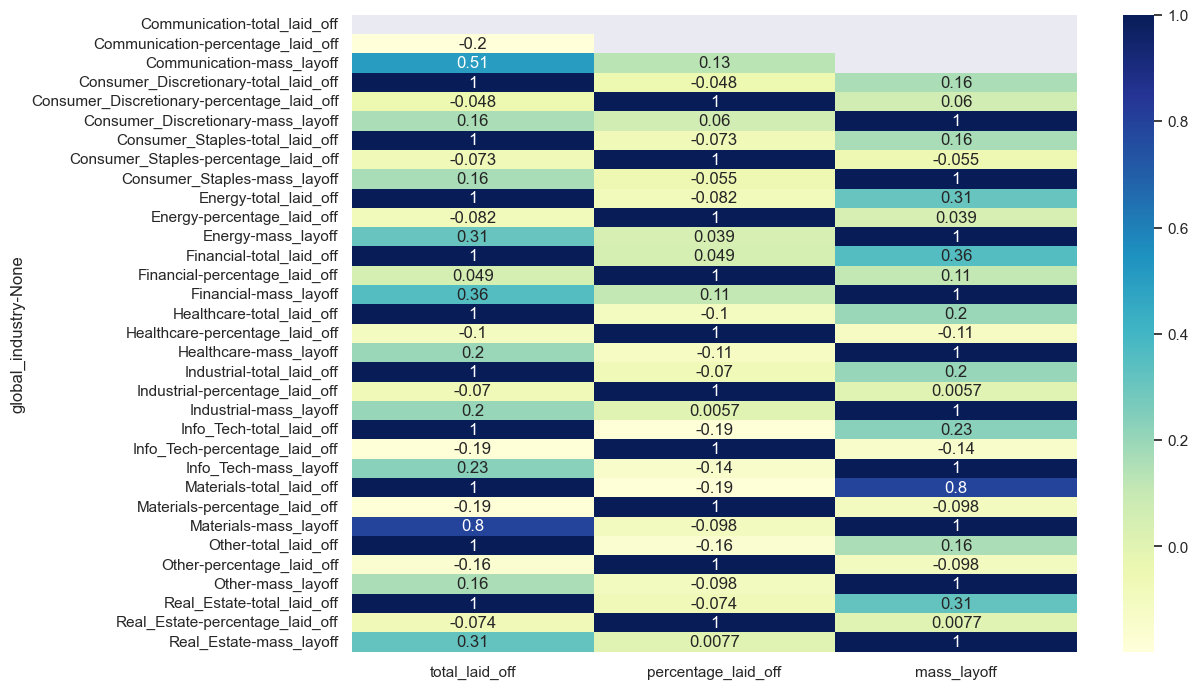

In [55]:
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(lay_g.corr()))
 
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(lay_g.corr(), cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
plt.show()

In [50]:
#Gruop by Country to see if heatmap looks any different.
lay_c = lay.groupby('country')
lay_c.first()

,company,location,industry,total_laid_off,percentage_laid_off,date,mass_layoff,global_industry
country,,,,,,,,
Argentina,Ualá,Buenos Aires,Finance,53.0,0.03,2022-11-30,1,Financial
Australia,Atlassian,Sydney,Other,500.0,0.05,2023-03-06,1,Other
Austria,Runtastic,Linz,Fitness,70.0,0.28,2023-03-16,1,Consumer_Discretionary
Brazil,Loft,Sao Paulo,Real Estate,340.0,0.15,2023-03-03,1,Real_Estate
Bulgaria,ScaleFocus,Sofia,Infrastructure,120.0,0.10,2020-06-11,1,Industrial
Canada,Absolute Software,Vancouver,Security,40.0,0.05,2023-04-06,0,Industrial
China,Huobi,Beijing,Crypto,275.0,0.20,2023-01-06,1,Financial
Denmark,Linkfire,Copenhagen,Marketing,35.0,0.35,2022-10-11,0,Industrial
Estonia,Veriff,Tallinn,Security,66.0,0.12,2023-02-09,1,Industrial


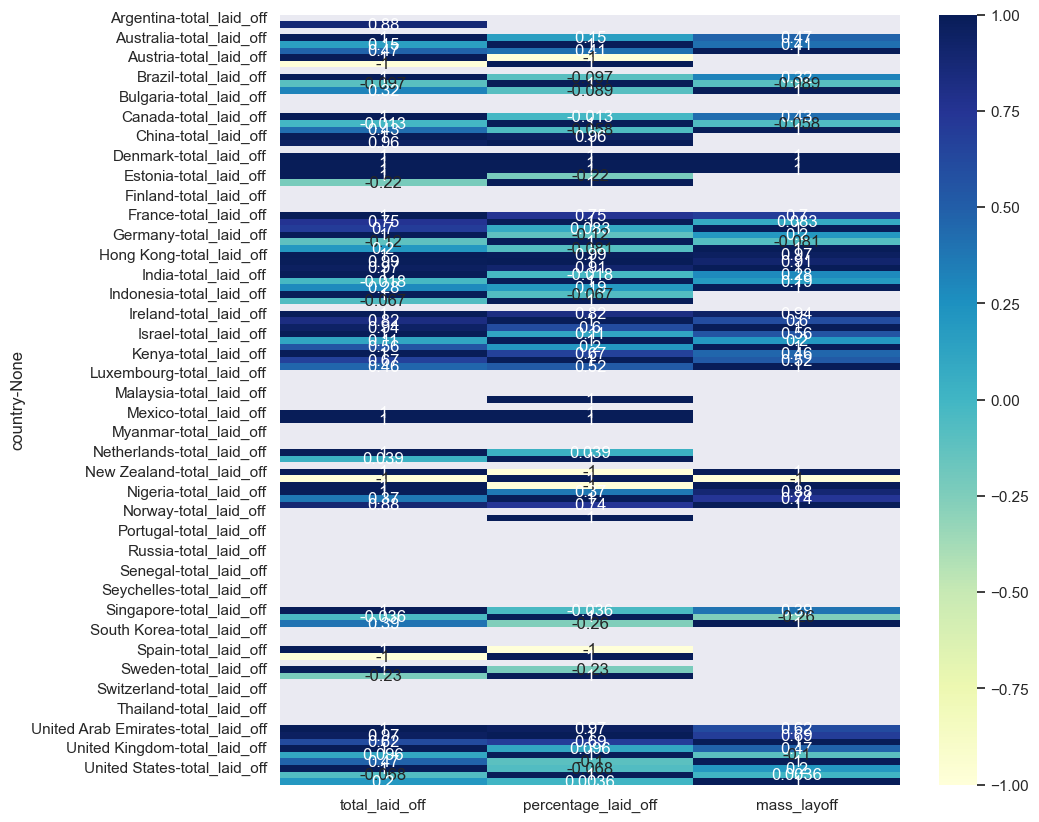

In [62]:
# Generate a mask for upper traingle
mask = np.triu(np.ones_like(lay_c.corr()))

#Change Size
plt.figure(figsize = (10,10))


# plotting a triangle correlation heatmap
dataplot = sns.heatmap(lay_c.corr(), cmap="YlGnBu", annot=True, mask=mask)
 
# displaying heatmap
plt.show()